<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

import warnings
warnings.filterwarnings("ignore")

In [55]:
import seaborn as sns

# Data Gathering

In [106]:
df = pd.read_csv("car_dataset.csv")
pd.set_option("display.max_columns", None)

# Data Preparation

In [107]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [108]:
df.describe().T

count          mean           std      min      25%      50%  \
Year           301.0   2013.627907      2.891554  2003.00   2012.0   2014.0   
Selling_Price  301.0      4.661296      5.082812     0.10      0.9      3.6   
Present_Price  301.0      7.628472      8.644115     0.32      1.2      6.4   
Kms_Driven     301.0  36947.205980  38886.883882   500.00  15000.0  32000.0   
Owner          301.0      0.043189      0.247915     0.00      0.0      0.0   

                   75%       max  
Year            2016.0    2018.0  
Selling_Price      6.0      35.0  
Present_Price      9.9      92.6  
Kms_Driven     48767.0  500000.0  
Owner              0.0       3.0

In [109]:
df.head(5)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [110]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [111]:
df["Car_Name"].nunique()

98

In [112]:
#98 different Companies and name of the companies wont affect the price of the car,so i will drop the columns car_name

In [113]:
df.shape

(301, 9)

In [114]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [115]:
df.drop("Car_Name",axis=1,inplace=True) #is there any null value present

In [116]:
df.isnull().values.any() # there is no null value present in dataset

False

##### Now we will check the data type of each column if the data type is numerical then we have no such issue but if datatype is categorical then we need to convert all those categorical features into numerical values.

In [117]:
df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [118]:
# As we observe above outout,there are some features which are having object data type. In next step i will create a 
#"cat_df" and will store all the categorical features into cat_df.

In [119]:
cat_df = df.select_dtypes(include="object")

In [120]:
cat_df.head()

Fuel_Type Seller_Type Transmission
0    Petrol      Dealer       Manual
1    Diesel      Dealer       Manual
2    Petrol      Dealer       Manual
3    Petrol      Dealer       Manual
4    Diesel      Dealer       Manual

In [121]:
# year represents the year in which car have been purchased, I need the number of the year car has been used?

In [122]:
df["Current_year"] = 2021

In [123]:
df.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current_year  
0       Manual      0          2021  
1       Manual      0          2021  
2       Manual      0          2021  
3       Manual      0          2021  
4       Manual      0          2021

In [124]:
df["Used_years"] = df["Current_year"] - df["Year"] 

In [125]:
df.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current_year  Used_years  
0       Manual      0          2021           7  
1       Manual      0          2021           8  
2       Manual      0          2021           4  
3       Manual      0          2021          10  
4       Manual      0          2021           7

In [126]:
df.drop(columns=["Year","Current_year"],inplace=True)

In [127]:
df.describe().T

count          mean           std     min      25%      50%  \
Selling_Price  301.0      4.661296      5.082812    0.10      0.9      3.6   
Present_Price  301.0      7.628472      8.644115    0.32      1.2      6.4   
Kms_Driven     301.0  36947.205980  38886.883882  500.00  15000.0  32000.0   
Owner          301.0      0.043189      0.247915    0.00      0.0      0.0   
Used_years     301.0      7.372093      2.891554    3.00      5.0      7.0   

                   75%       max  
Selling_Price      6.0      35.0  
Present_Price      9.9      92.6  
Kms_Driven     48767.0  500000.0  
Owner              0.0       3.0  
Used_years         9.0      18.0

###### On an average car has been driven 36947 kilometres and max distance the car has been traveled is 5,00,000 kilometres. The car with highest ex-showroom selling price present in data set is 92.6 lakh. Maximum number of years car has been used and then come for sell is 18 years.maximum number of owner that has used a single car is 3.Maximum selling price for used car is 35 lakh rupees. This is how we make conclusion with statistical description of dataset.

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


# Step 4 :-) Data Visualization

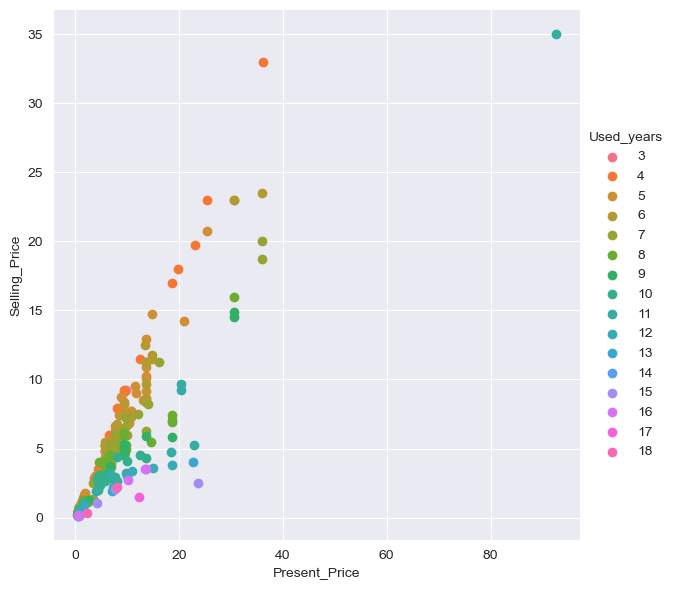

In [128]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="Used_years",height=6).map(plt.scatter,"Present_Price","Selling_Price").add_legend()
plt.show()

##### More number of Years you will use your car lesser the amount you will get.

### Features and target variable

In [129]:
df.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Used_years  
0       Manual      0           7  
1       Manual      0           8  
2       Manual      0           4  
3       Manual      0          10  
4       Manual      0           7

In [130]:
df.drop(columns=cat_df.columns,inplace=True)

In [131]:
df.head()

Selling_Price  Present_Price  Kms_Driven  Owner  Used_years
0           3.35           5.59       27000      0           7
1           4.75           9.54       43000      0           8
2           7.25           9.85        6900      0           4
3           2.85           4.15        5200      0          10
4           4.60           6.87       42450      0           7

###### Now we will do feature engineering on cat_df to convert the categorical variable into numerical variable.But before that we will check how many unique categorical variable each feature consists.

In [132]:
dict1={}
for index,col in enumerate(cat_df.columns):
    dict1[col]=cat_df[col].unique().tolist()
dict1   #key is feature and values will be cat variables

{'Fuel_Type': ['Petrol', 'Diesel', 'CNG'],
 'Seller_Type': ['Dealer', 'Individual'],
 'Transmission': ['Manual', 'Automatic']}

In [133]:
cat_df = pd.get_dummies(cat_df,drop_first = True)
cat_df.head()

Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

###### Now we will concatenate encoded cat_df with original df and will also delete the categorical variable column.

In [142]:
df=pd.concat([df,cat_df],axis=1)
df.head()

Selling_Price  Present_Price  Kms_Driven  Owner  Used_years  \
0           3.35           5.59       27000      0           7   
1           4.75           9.54       43000      0           8   
2           7.25           9.85        6900      0           4   
3           2.85           4.15        5200      0          10   
4           4.60           6.87       42450      0           7   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

###### Now we have converted all the features into numerical variable.Here we will check correlation between feature but for this dataset we won’t do feature selection,Because Feature selection is used when we have large features in a dataset but in this dataset we only check how features in dataset are correlated with each other.

In [137]:
%matplotlib inline

<AxesSubplot:>

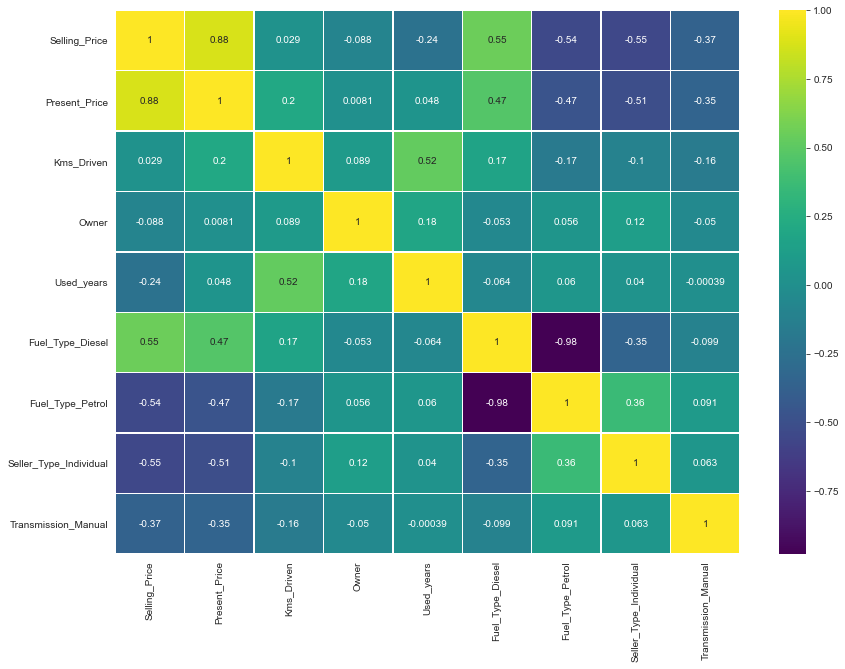

In [148]:
fig, ax = plt.subplots(figsize=(14,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5,cmap="viridis", ax=ax)

### Splitting data into training and testing

###### Splitting dataset into dependent and independent variable.

In [153]:
X.head()

Present_Price  Kms_Driven  Owner  Used_years  Fuel_Type_Diesel  \
0           5.59       27000      0           7                 0   
1           9.54       43000      0           8                 1   
2           9.85        6900      0           4                 0   
3           4.15        5200      0          10                 0   
4           6.87       42450      0           7                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

In [150]:
X = df.drop("Selling_Price",axis=1)
y = df["Selling_Price"]

In [152]:
print(X.shape)
print(y.shape)

(301, 8)
(301,)


In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [155]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


##  Model Building (Linear Regression)

In [157]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

# Model Evaluation

In [158]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)


print("Train Results")
print('rmse:', np.sqrt(mean_squared_error(y_train, lin_model.predict(X_train))))
print('r2: ', r2_score(y_train, lin_model.predict(X_train)))
print()
print("Test Results")
print('rmse:', np.sqrt(mean_squared_error(y_test, lin_model.predict(X_test))))
print('r2: ', r2_score(y_test, lin_model.predict(X_test)))

Train Results
rmse: 1.775357775174971
r2:  0.8822783397439672

Test Results
rmse: 1.726958268708236
r2:  0.8625260513315253


# Interpret the model

###### There is not a big difference between test and tain values. So we can say that overfitting is out of the question. 

# Regularization

# Ridge

In [159]:
ridgecv  = RidgeCV(alphas = 10**np.linspace(10,-2,100)*0.5, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
print("Optimal lambda: " ,ridgecv.alpha_)
print()
print("Train Results")
print('rmse:', np.sqrt(mean_squared_error(y_train, ridge_tuned.predict(X_train))))
print('r2: ', r2_score(y_train, ridge_tuned.predict(X_train)))
print()
print("Test Results")
print('rmse:', np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test))))
print('r2: ', r2_score(y_test, ridge_tuned.predict(X_test)))

#print('\nKatsayilar:\n')
#print('ß0: ', ridge_tuned.intercept_)
#print()
#print(pd.Series(ridge_tuned.coef_, index = X_train.columns))

Optimal lambda:  0.14240179342179024

Train Results
rmse: 1.7754697400829997
r2:  0.8822634907814927

Test Results
rmse: 1.725595065708022
r2:  0.8627430003303471


# Lasso

In [160]:
lassocv  = LassoCV(alphas = 10**np.linspace(10,-2,100)*0.5,  max_iter=100000, cv = 10, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_
print('optimal lambda: ', lassocv.alpha_)
lasso_tuned = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
print()
print("Train Results")
print('rmse:', np.sqrt(mean_squared_error(y_train, lasso_tuned.predict(X_train))))
print('r2: ', r2_score(y_train, lasso_tuned.predict(X_train)))
print()
print("Test Results")
print('rmse:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2: ', r2_score(y_test, y_pred))
#print('\nKatsayilar:\n')
#print(pd.Series(lasso_tuned.coef_, index = X_train.columns))

optimal lambda:  0.005

Train Results
rmse: 1.7760794819410675
r2:  0.8821826094199651

Test Results
rmse: 1.6867212351212577
r2:  0.8688575339791864


## Elastic-Net 

In [161]:
enet_cv  = ElasticNetCV(alphas = 10**np.linspace(10,-2,100)*0.5, l1_ratio=[.1,.2,.3,.5,.7,.8,.9,1], max_iter=100000, cv = 10, normalize = True)
enet_cv.fit(X_train, y_train)
enet_cv.alpha_
print('optimal lambda: ', enet_cv.alpha_)
print("optimal l1_ratio", enet_cv.l1_ratio_)
enet_tuned = ElasticNet(alpha = enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_).fit(X_train, y_train)
y_pred = enet_tuned.predict(X_test)
print()
print("Train Results")
print('rmse:', np.sqrt(mean_squared_error(y_train, enet_cv.predict(X_train))))
print('r2: ', r2_score(y_train, enet_cv.predict(X_train)))
print()
print("Test Results")
print('rmse:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2: ', r2_score(y_test, y_pred))
print()

# print('\nKatsayilar:\n')
# print('ß0: ', enet_cv.intercept_)
# print(pd.Series(enet_tuned.coef_, index = X_train.columns))

optimal lambda:  0.005
optimal l1_ratio 0.9

Train Results
rmse: 1.8563422700405474
r2:  0.8712934309708893

Test Results
rmse: 1.689240381887503
r2:  0.8684655144601847



In [162]:
coefs_df = pd.DataFrame(enet_tuned.coef_, index=X.columns)
coefs_df = coefs_df.rename(columns={0: "Coefficents"})

In [163]:
len(coefs_df)

8

In [164]:
len(coefs_df[coefs_df["Coefficents"]>0])

3

In [165]:
coefs_df[coefs_df["Coefficents"]>0]

Coefficents
Present_Price        0.439381
Owner                0.154716
Fuel_Type_Diesel     1.736749

# Linear regression does not give us a critical result, we can try other models. 